In [1]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [2]:
train_path = '/home/saurabh/Datasets/GSRTB/data/Train'
image_height = 30
image_width = 30

In [4]:
number_of_categories = len(os.listdir(train_path))
print(number_of_categories)

43


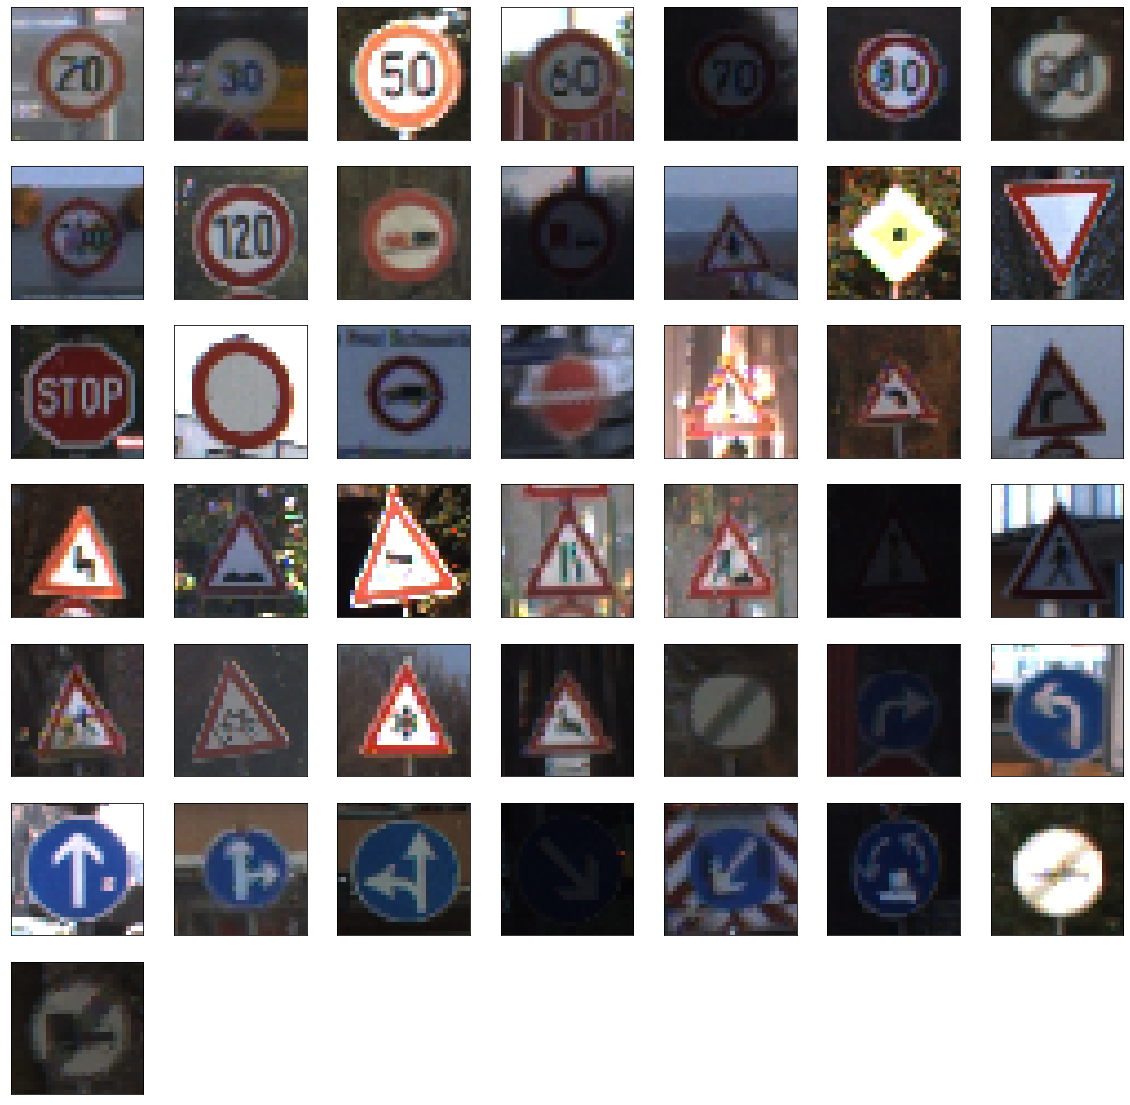

In [8]:
# Visualizing all the different Signs
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(20,20))
index = 0
for i in range(number_of_categories):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(image_width, image_height))
    plt.imshow(img)
plt.show()

In [12]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(number_of_categories):
        categories = os.path.join(data_dir, str(category))
        for image in os.listdir(categories):
            img = load_img(os.path.join(categories, image), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    return images, labels

In [13]:
images, labels = load_data(train_path)

In [15]:
labels = to_categorical(labels)

In [17]:
labels.shape

(39209, 43)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.2)

In [20]:
x_train.shape

(31367, 30, 30, 3)

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(image_height,image_width,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(number_of_categories, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, steps_per_epoch=60)

Epoch 1/30
60/60 [==============================] - 131s 2s/step - loss: 6.9770 - accuracy: 0.0853 - val_loss: 3.3578 - val_accuracy: 0.1798
Epoch 2/30
60/60 [==============================] - 130s 2s/step - loss: 2.8105 - accuracy: 0.3061 - val_loss: 2.2402 - val_accuracy: 0.4380
Epoch 3/30
60/60 [==============================] - 107s 2s/step - loss: 1.7946 - accuracy: 0.5359 - val_loss: 1.3861 - val_accuracy: 0.6336
Epoch 4/30
60/60 [==============================] - 100s 2s/step - loss: 1.1275 - accuracy: 0.6916 - val_loss: 0.9209 - val_accuracy: 0.7442
Epoch 5/30
60/60 [==============================] - 99s 2s/step - loss: 0.7474 - accuracy: 0.7963 - val_loss: 0.6935 - val_accuracy: 0.8095
Epoch 6/30
60/60 [==============================] - 101s 2s/step - loss: 0.5410 - accuracy: 0.8529 - val_loss: 0.5391 - val_accuracy: 0.8593
Epoch 7/30
60/60 [==============================] - 111s 2s/step - loss: 0.4057 - accuracy: 0.8885 - val_loss: 0.4456 - val_accuracy: 0.8789
Epoch 8/30
60/

In [27]:
loss, accuracy = model.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

246/246 [==============================] - 7s 28ms/step - loss: 0.1774 - accuracy: 0.9679
test set accuracy:  96.78653478622437


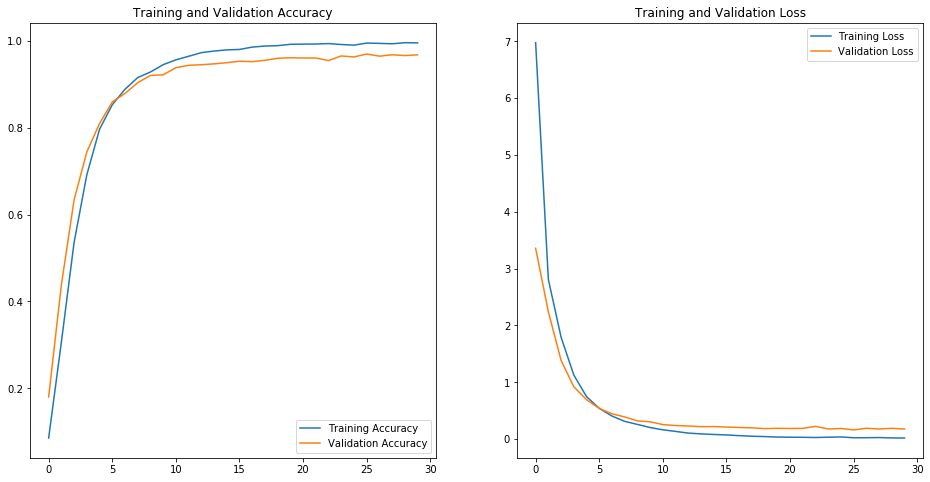

In [30]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
model.save('/home/saurabh/Datasets/GSRTB/Notebook/Model/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /home/saurabh/Datasets/GSRTB/Notebook/Model/assets


In [33]:
model.save('/home/saurabh/Datasets/GSRTB/Notebook/Model/my_model.h5')

In [34]:
test_path = '/home/saurabh/Datasets/GSRTB/data'

In [36]:
from sklearn.metrics import accuracy_score
import pandas as pd

Y_test = pd.read_csv('/home/saurabh/Datasets/GSRTB/data/Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(test_path, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
pred = model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Test Data accuracy:  88.5827395091053


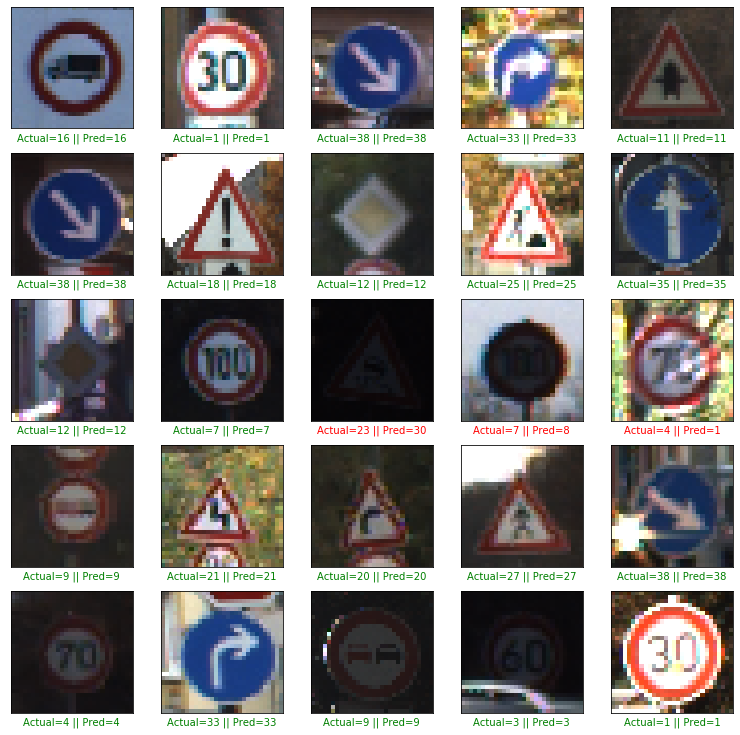

In [37]:
plt.figure(figsize = (13, 13))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()